# Lab-5    Convolution Neural Networks

Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a
random kernel of size (3,3) using torch.nn.functional.conv2d.
What is the dimension of the output image? Apply, various values for parameter stride=1
and note the change in the dimension of the output image. Arrive at an equation for the
output image size with respect to the kernel size and stride and verify your answer with
code. Now, repeat the exercise by changing padding parameter. Obtain a formula using
kernel, stride, and padding to get the output image size. What is the total number of
parameters in your network? Verify with code

In [1]:
import torch
import torch.nn.functional as F

img = torch.rand(6, 6)
print("image=", img)

img = img.unsqueeze(0).unsqueeze(0)

kern = torch.ones(3, 3)
print("kernel=", kern)
kern = kern.unsqueeze(0).unsqueeze(0)

out1 = F.conv2d(img, kern, stride=1, padding=0)
print("outimage with stride=1, padding=0:",out1.shape)

out2 = F.conv2d(img, kern, stride=2, padding=0)
print("outimage with stride=2, padding=0:",out2.shape)

out3 = F.conv2d(img, kern, stride=1, padding=1)
print("outimage with stride=1, padding=1:",out3.shape)

H, W = 6, 6
K = 3
S = 1
P = 0
H_out = (H + 2 * P - K) // S + 1
W_out = (W + 2 * P - K) // S + 1
print(f"Calculated Output Size: ({H_out}, {W_out})")

params = (K * K * 1 + 1) * 1
print(f"Total parameters: {params}")


image= tensor([[0.5921, 0.4547, 0.9922, 0.9141, 0.7964, 0.2741],
        [0.4367, 0.1131, 0.4326, 0.9498, 0.8838, 0.8722],
        [0.5092, 0.0718, 0.7018, 0.7695, 0.1157, 0.8577],
        [0.7811, 0.8400, 0.2162, 0.7850, 0.8404, 0.7855],
        [0.2216, 0.8768, 0.2863, 0.5674, 0.6041, 0.2145],
        [0.5554, 0.1167, 0.7852, 0.3240, 0.5125, 0.0153]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage with stride=1, padding=0: torch.Size([1, 1, 4, 4])
outimage with stride=2, padding=0: torch.Size([1, 1, 2, 2])
outimage with stride=1, padding=1: torch.Size([1, 1, 6, 6])
Calculated Output Size: (4, 4)
Total parameters: 10


Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D
to get the same output. You may ignore bias.

In [2]:
import torch.nn as nn

img = torch.rand(1, 1, 6, 6)
print(f"Input image:\n{img}")
print(f"Input image shape: {img.shape}")

conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
out_img = conv(img)
print(f"Output Image using nn.Conv2d:\n{out_img}")
print(f"Output image shape: {out_img.shape}")

kernels = conv.weight.data
out_img1 = F.conv2d(img, kernels, stride=1, padding=0)
print(f"Output Image using F.conv2d:\n{out_img1}")
print(f"Output image shape: {out_img1.shape}")

Input image:
tensor([[[[0.3727, 0.3639, 0.7321, 0.8344, 0.7007, 0.0958],
          [0.5498, 0.9975, 0.3341, 0.9987, 0.1842, 0.8786],
          [0.6732, 0.6992, 0.0794, 0.3109, 0.8862, 0.7585],
          [0.3706, 0.0969, 0.1200, 0.5657, 0.6998, 0.0437],
          [0.1866, 0.1313, 0.2467, 0.7467, 0.9455, 0.4306],
          [0.1665, 0.6371, 0.4231, 0.7482, 0.5858, 0.9903]]]])
Input image shape: torch.Size([1, 1, 6, 6])
Output Image using nn.Conv2d:
tensor([[[[ 0.1159,  0.3067,  0.5298,  0.5952],
          [ 0.2071,  0.4164,  0.5262,  0.4259],
          [ 0.2905,  0.5410,  0.3644,  0.0656],
          [ 0.2369,  0.3162,  0.3651,  0.5286]],

         [[ 0.0376,  0.2651,  0.0941,  0.5143],
          [ 0.1200,  0.3477,  0.2533,  0.2931],
          [ 0.2032,  0.2081,  0.0389, -0.0392],
          [ 0.1373, -0.0314,  0.1220,  0.0237]],

         [[-0.1783,  0.0102,  0.1423, -0.1697],
          [ 0.0174,  0.2070, -0.0271, -0.1798],
          [ 0.0768,  0.0963,  0.0213, -0.0161],
          [-0.0725

Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.
Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward
network on numerical data as outlined below.
Define model architecture
Load dataset from disk
Loop over epochs and batches
Make predictions and compute loss
Properly zero our gradient, perform backpropagation, and update model parameters

In [10]:
class CNNClassifier(nn.Module):
    def __init__(self, conv_config):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, conv_config[0], kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(conv_config[0], conv_config[1], kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(conv_config[1], conv_config[2], kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        self._calculate_conv_output_size()
        self.classification_head = nn.Sequential(
            nn.Linear(self.conv_output_size, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)
        )

    def _calculate_conv_output_size(self):
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 28, 28) 
            x = self.net(dummy_input)
            self.conv_output_size = x.numel() 

    def forward(self, x):
        features = self.net(x)
        flattened_features = features.view(features.size(0), -1)
        output = self.classification_head(flattened_features)
        return output

Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of
percentage drop in parameters vs accuracy

Accuracy: 98.37%
Number of learnable parameters: 149798


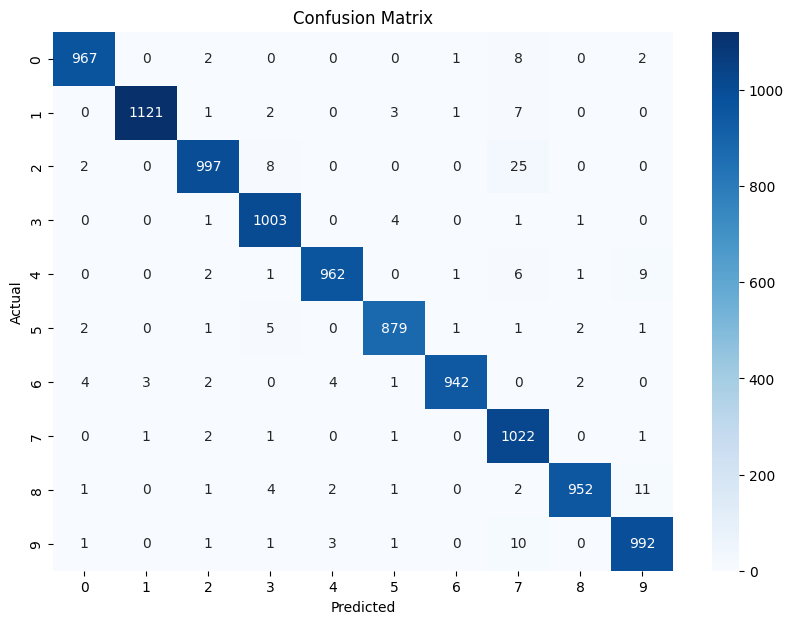

In [4]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_and_evaluate(model, trainloader, testloader, criterion, optimizer, epochs=5):
    model.train()
    for _ in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs), labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    all_preds = []
    all_labels = []
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / len(testloader.dataset)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    return accuracy, conf_matrix

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainloader = DataLoader(datasets.MNIST(root='./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
testloader = DataLoader(datasets.MNIST(root='./data', train=False, download=True, transform=transform), batch_size=64, shuffle=False)

model = CNNClassifier([64, 128, 64]).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

accuracy, conf_matrix = train_and_evaluate(model, trainloader, testloader, criterion, optimizer)
print(f"Accuracy: {accuracy}%")
print(f"Number of learnable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

plot_confusion_matrix(conf_matrix)


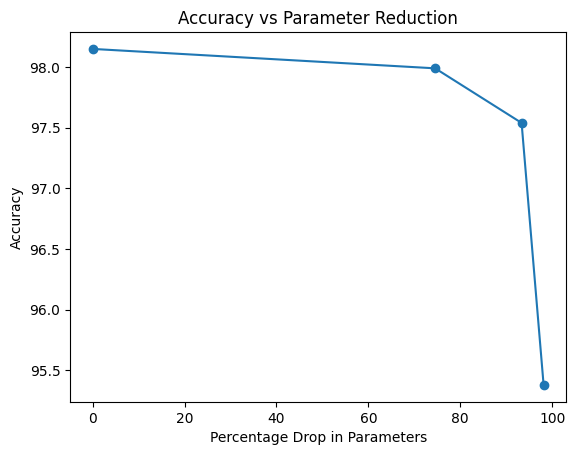

In [6]:
def experiment_with_configs(conv_configs):
    accuracies, parameter_counts = [], []
    for conv_config in conv_configs:
        model = CNNClassifier(conv_config).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        accuracy, conf_matrix = train_and_evaluate(model, trainloader, testloader, criterion, optimizer)
        accuracies.append(accuracy)
        
        params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        parameter_counts.append(params)

    return accuracies, parameter_counts

def plot_param_vs_accuracy(param_counts, accuracies):
    param_drops = [(param_counts[0] - count) / param_counts[0] * 100 for count in parameter_counts]
    plt.plot(param_drops, accuracies, marker='o')
    plt.xlabel('Percentage Drop in Parameters')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Parameter Reduction')
    plt.show()


conv_configs = [
    [64, 128, 64],  
    [32, 64, 32],  
    [16, 32, 16],   
    [8, 16, 8]      
]

accuracies, parameter_counts = experiment_with_configs(conv_configs)
plot_param_vs_accuracy(parameter_counts, accuracies)


In [7]:
print(parameter_counts)

[149798, 38150, 9974, 2798]
